In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
from custom_functions import loadmat
help(loadmat)

Help on function loadmat in module custom_functions:

loadmat(filename)
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects



In [100]:
# import scipy.io as spio
# # https://stackoverflow.com/questions/7008608/scipy-io-loadmat-nested-structures-i-e-dictionaries

# def loadmat(filename):
#     '''
#     this function should be called instead of direct spio.loadmat
#     as it cures the problem of not properly recovering python dictionaries
#     from mat files. It calls the function check keys to cure all entries
#     which are still mat-objects
#     '''
#     data = spio.loadmat(filename, struct_as_record=False, squeeze_me=True)
#     return _check_keys(data)

# def _check_keys(dict):
#     '''
#     checks if entries in dictionary are mat-objects. If yes
#     todict is called to change them to nested dictionaries
#     '''
#     for key in dict:
#         if isinstance(dict[key], spio.matlab.mio5_params.mat_struct):
#             dict[key] = _todict(dict[key])
#     return dict        

# def _todict(matobj):
#     '''
#     A recursive function which constructs from matobjects nested dictionaries
#     '''
#     dict = {}
#     for strg in matobj._fieldnames:
#         elem = matobj.__dict__[strg]
#         if isinstance(elem, spio.matlab.mio5_params.mat_struct):
#             dict[strg] = _todict(elem)
#         else:
#             dict[strg] = elem
#     return dict

In [102]:
# t = loadmat('Z:/All_Staff/Behavior/Data/data-i9999-210915-1821.mat')
# t = loadmat('Z:/All_Staff/Behavior/Data/data-i9999-210916-1626.mat')
t = loadmat('Z:/All_Staff/Behavior/Data/data-i9999-210917-1646.mat')

t['input'].keys()

dict_keys(['trialSinceReset', 'startDateVec', 'saveTime', 'savedEvents', 'eventCodecs', 'ntrials', 'cItiStart', 'cStimOneOn', 'cStimOneOff', 'cStimTwoOn', 'cStimTwoOff', 'tisiTimeMs', 'tstimOne', 'tstimTwo', 'tisiTimeFrames', 'titiTimeFrames', 'tstimOnTimeFrames', 'constList', 'subjectNum', 'frameRateHz', 'index', 'xSize', 'ySize', 'xPosition', 'yPosition', 'isiTimeMs', 'randIsiTimeStart', 'randIsiTimeInterval', 'itiTimeMs', 'stimOnTimeMs', 'stimOne', 'stimTwo', 'doRandIsiTime', 'doRepeatStimOne', 'doRepeatStimTwo', 'doRandStimOne', 'doRandStimTwo', 'doSameStims', 'DoWheelSpeed', 'constChangedOnTrial', 'counterTimesUs', 'counterValues', 'lastTimeSavedMs', 'didASave', 'savedDataName', 'lastPlotElapsedS', 'changedStr'])

In [103]:
behav = t['input']
stim1 = behav['tstimOne']
len(stim1)

676

In [104]:
stim1 = stim1[:500]
len(stim1)

500

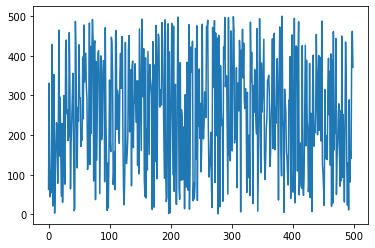

In [105]:
plt.plot(stim1)

In [106]:
len(np.unique(stim1))

500

In [107]:
stim_all = np.linspace(1,500,500).astype(int)
len(np.setdiff1d(stim_all, stim1))

0

In [108]:
np.setdiff1d(stim_all, stim1)

array([], dtype=int32)

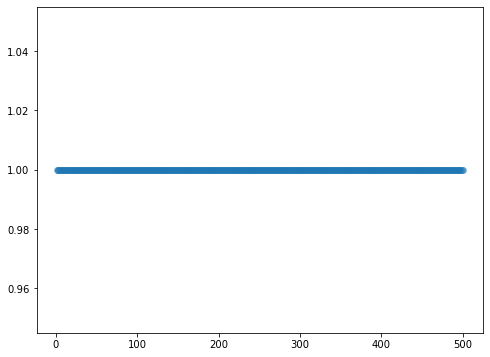

In [109]:
values, counts = np.unique(stim1, return_counts=True)
plt.figure(figsize=(8,6))
plt.scatter(values, counts, alpha=0.4);

In [110]:
df = pd.DataFrame(columns=["stim", "rep"])
df.stim = values
df.rep = counts
df

,stim,rep
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
495,496,1
496,497,1
497,498,1
498,499,1


In [111]:
df[df.rep>1].rep.sum() - df[df.rep>1].rep.count()

0

In [113]:
np.unique(counts)

array([1], dtype=int64)